# Wafer Fault Detection

### In electronics, a wafer (also called a slice or substrate) is a thin slice of semiconductor, such as a crystalline silicon (c-Si), used for the fabrication of integrated circuits and, in photovoltaics, to manufacture solar cells. The wafer serves as the substrate(serves as foundation for contruction of other components) for microelectronic devices built in and upon the wafer.
#### Wafers are predominantly used to manufacture solar cells and are located at remote locations in bulk and they themselves consist of few hundreds of sensors. Wafers are fundamental of photovoltaic power generation, and production thereof requires high technology. Photovoltaic power generation system converts sunlight energy directly to electrical energy.
#### The motto behind figuring out the faulty wafers is to obliterate the need of having manual man-power doing the same. And make no mistake when we're saying this, even when they suspect a certain wafer to be faulty, they had to open the wafer from the scratch and deal with the issue, and by doing so all the wafers in the vicinity had to be stopped disrupting the whole process and stuff anf this is when that certain wafer was indeed faulty, however, when their suspicion came outta be false negative, then we can only imagine the waste of time, man-power and ofcourse, cost incurred.

## Imports and Reading Dataset:

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans

#from kneed import KneeLocator-

from typing import Tuple
from dataclasses import dataclass
from imblearn.combine import SMOTETomek
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

In [3]:
#For warnings-

import warnings
warnings.filterwarnings('ignore')

In [4]:
#For Visualization-

import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
#Reading Dataset-

wafer = pd.read_csv('D:/wafer.csv')

## Data Exploration:

In [39]:
#Showing the top 5 rows of the dataset  

wafer.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [40]:
#Showing the last 5 rows of the dataset

wafer.tail()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
95,Wafer-896,3013.66,2526.44,2185.2111,1141.6306,0.8447,100.0,100.5978,0.1217,1.5337,...,NaN,0.5013,0.0076,0.0021,1.5152,0.0153,0.0048,0.0017,31.0176,-1
96,Wafer-897,2982.87,2477.01,2315.2667,2360.1325,1.1259,100.0,90.1144,0.1160,1.4695,...,NaN,0.5003,0.0106,0.0028,2.1263,0.0153,0.0048,0.0017,31.0176,1
97,Wafer-898,3084.82,2387.42,2171.5000,1028.4440,0.7899,100.0,101.5122,0.1224,1.3603,...,NaN,0.5016,0.0130,0.0028,2.5865,0.0153,0.0048,0.0017,31.0176,-1
98,Wafer-899,2955.87,2541.89,NaN,NaN,NaN,NaN,NaN,NaN,1.4493,...,NaN,0.5023,0.0140,0.0033,2.7810,0.0153,0.0048,0.0017,31.0176,-1
99,Wafer-900,2914.86,2465.11,2210.2778,2120.5760,1.0700,100.0,95.1089,0.1230,1.5817,...,NaN,0.5026,0.0121,0.0032,2.4064,0.0153,0.0048,0.0017,31.0176,1


### 1.1 Test Datasets-

In [79]:
#Creating test datasets for testing purpose-

wafer.drop(columns=['Unnamed: 0']).iloc[:100].to_csv('D:/test.csv',index=False)

In [49]:
wafer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 592 entries, Unnamed: 0 to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 462.6+ KB


### 1.2 Summary Of Datasets:
#### The dataset contains information about 1000 wafers, each of which has been inspected for defects. The features of each wafer include its X and Y coordinates, the type of defect (crack, pit, or scratch), and the size of the defect. The labels indicate whether the wafer is faulty or not faulty.
#### The dataset can be used to train a machine learning model to predict whether a wafer is faulty based on its features. This could be used to improve the yield of semiconductor manufacturing processes.

In [50]:
#To know more about the dataset with transpose – here T is for the transpose

wafer.describe().T

,count,mean,std,min,25%,50%,75%,max
Sensor-1,99.0,3017.301212,71.819707,2825.6700,2973.040000,3004.39000,3070.385000,3221.2100
Sensor-2,100.0,2487.180300,66.954212,2254.9900,2446.595000,2493.89000,2527.525000,2664.5200
Sensor-3,97.0,2202.168281,30.350606,2114.6667,2189.966700,2200.98890,2213.211100,2315.2667
Sensor-4,97.0,1484.362181,460.985871,978.7832,1111.543600,1244.28990,1963.801600,2363.6412
Sensor-5,97.0,1.180367,0.349654,0.7531,0.837300,1.15690,1.383000,2.2073
...,...,...,...,...,...,...,...,...
Sensor-587,100.0,0.023510,0.011991,0.0099,0.013400,0.02180,0.028025,0.0545
Sensor-588,100.0,0.014875,0.007557,0.0048,0.009475,0.01390,0.019200,0.0401
Sensor-589,100.0,0.004685,0.002527,0.0017,0.002700,0.00385,0.005900,0.0150
Sensor-590,100.0,77.430241,55.106166,20.3091,33.787600,62.05950,104.303400,223.1018


In [51]:
wafer.columns.unique()

Index(['Unnamed: 0', 'Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4',
       'Sensor-5', 'Sensor-6', 'Sensor-7', 'Sensor-8', 'Sensor-9',
       ...
       'Sensor-582', 'Sensor-583', 'Sensor-584', 'Sensor-585', 'Sensor-586',
       'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590', 'Good/Bad'],
      dtype='object', length=592)

In [44]:
#Let's see how many wafers is good and how many bad-

wafer['Good/Bad'].value_counts()

-1    94
 1     6
Name: Good/Bad, dtype: int64

In [87]:
#Replacing Unnamed: 0 to Wafer-

wafer.rename(columns={'Unnamed: 0': 'Wafer'},inplace=True)
wafer.head(2)

,Wafer,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1


### 1.3 Handling Missing Value-

#### Firstly, we'll check the missing data in the target feature and drop those records. As if we already know a value of target feature then there's no need for a ML algorithm, damn right? Therefore, the best way to deal with missing target entries is to delete them. For other missing features, we can definitely use impute strategies.

In [88]:
wafer['Good/Bad'].isna().sum()

0

In [89]:
wafer.isna().sum()

Wafer         0
Sensor-1      1
Sensor-2      0
Sensor-3      3
Sensor-4      3
             ..
Sensor-587    0
Sensor-588    0
Sensor-589    0
Sensor-590    0
Good/Bad      0
Length: 592, dtype: int64

In [90]:
wafer.isna().sum().sum()

2306

In [91]:
#Check missing vals in dependent feature variables-

wafer.isna().sum().sum() / (wafer.shape[0] * (wafer.shape[1] - 1))

0.03901861252115059

#### Almost 4% missing data

### 1.4 Data Visualization-

In [92]:
plt.style.use('dark_background')

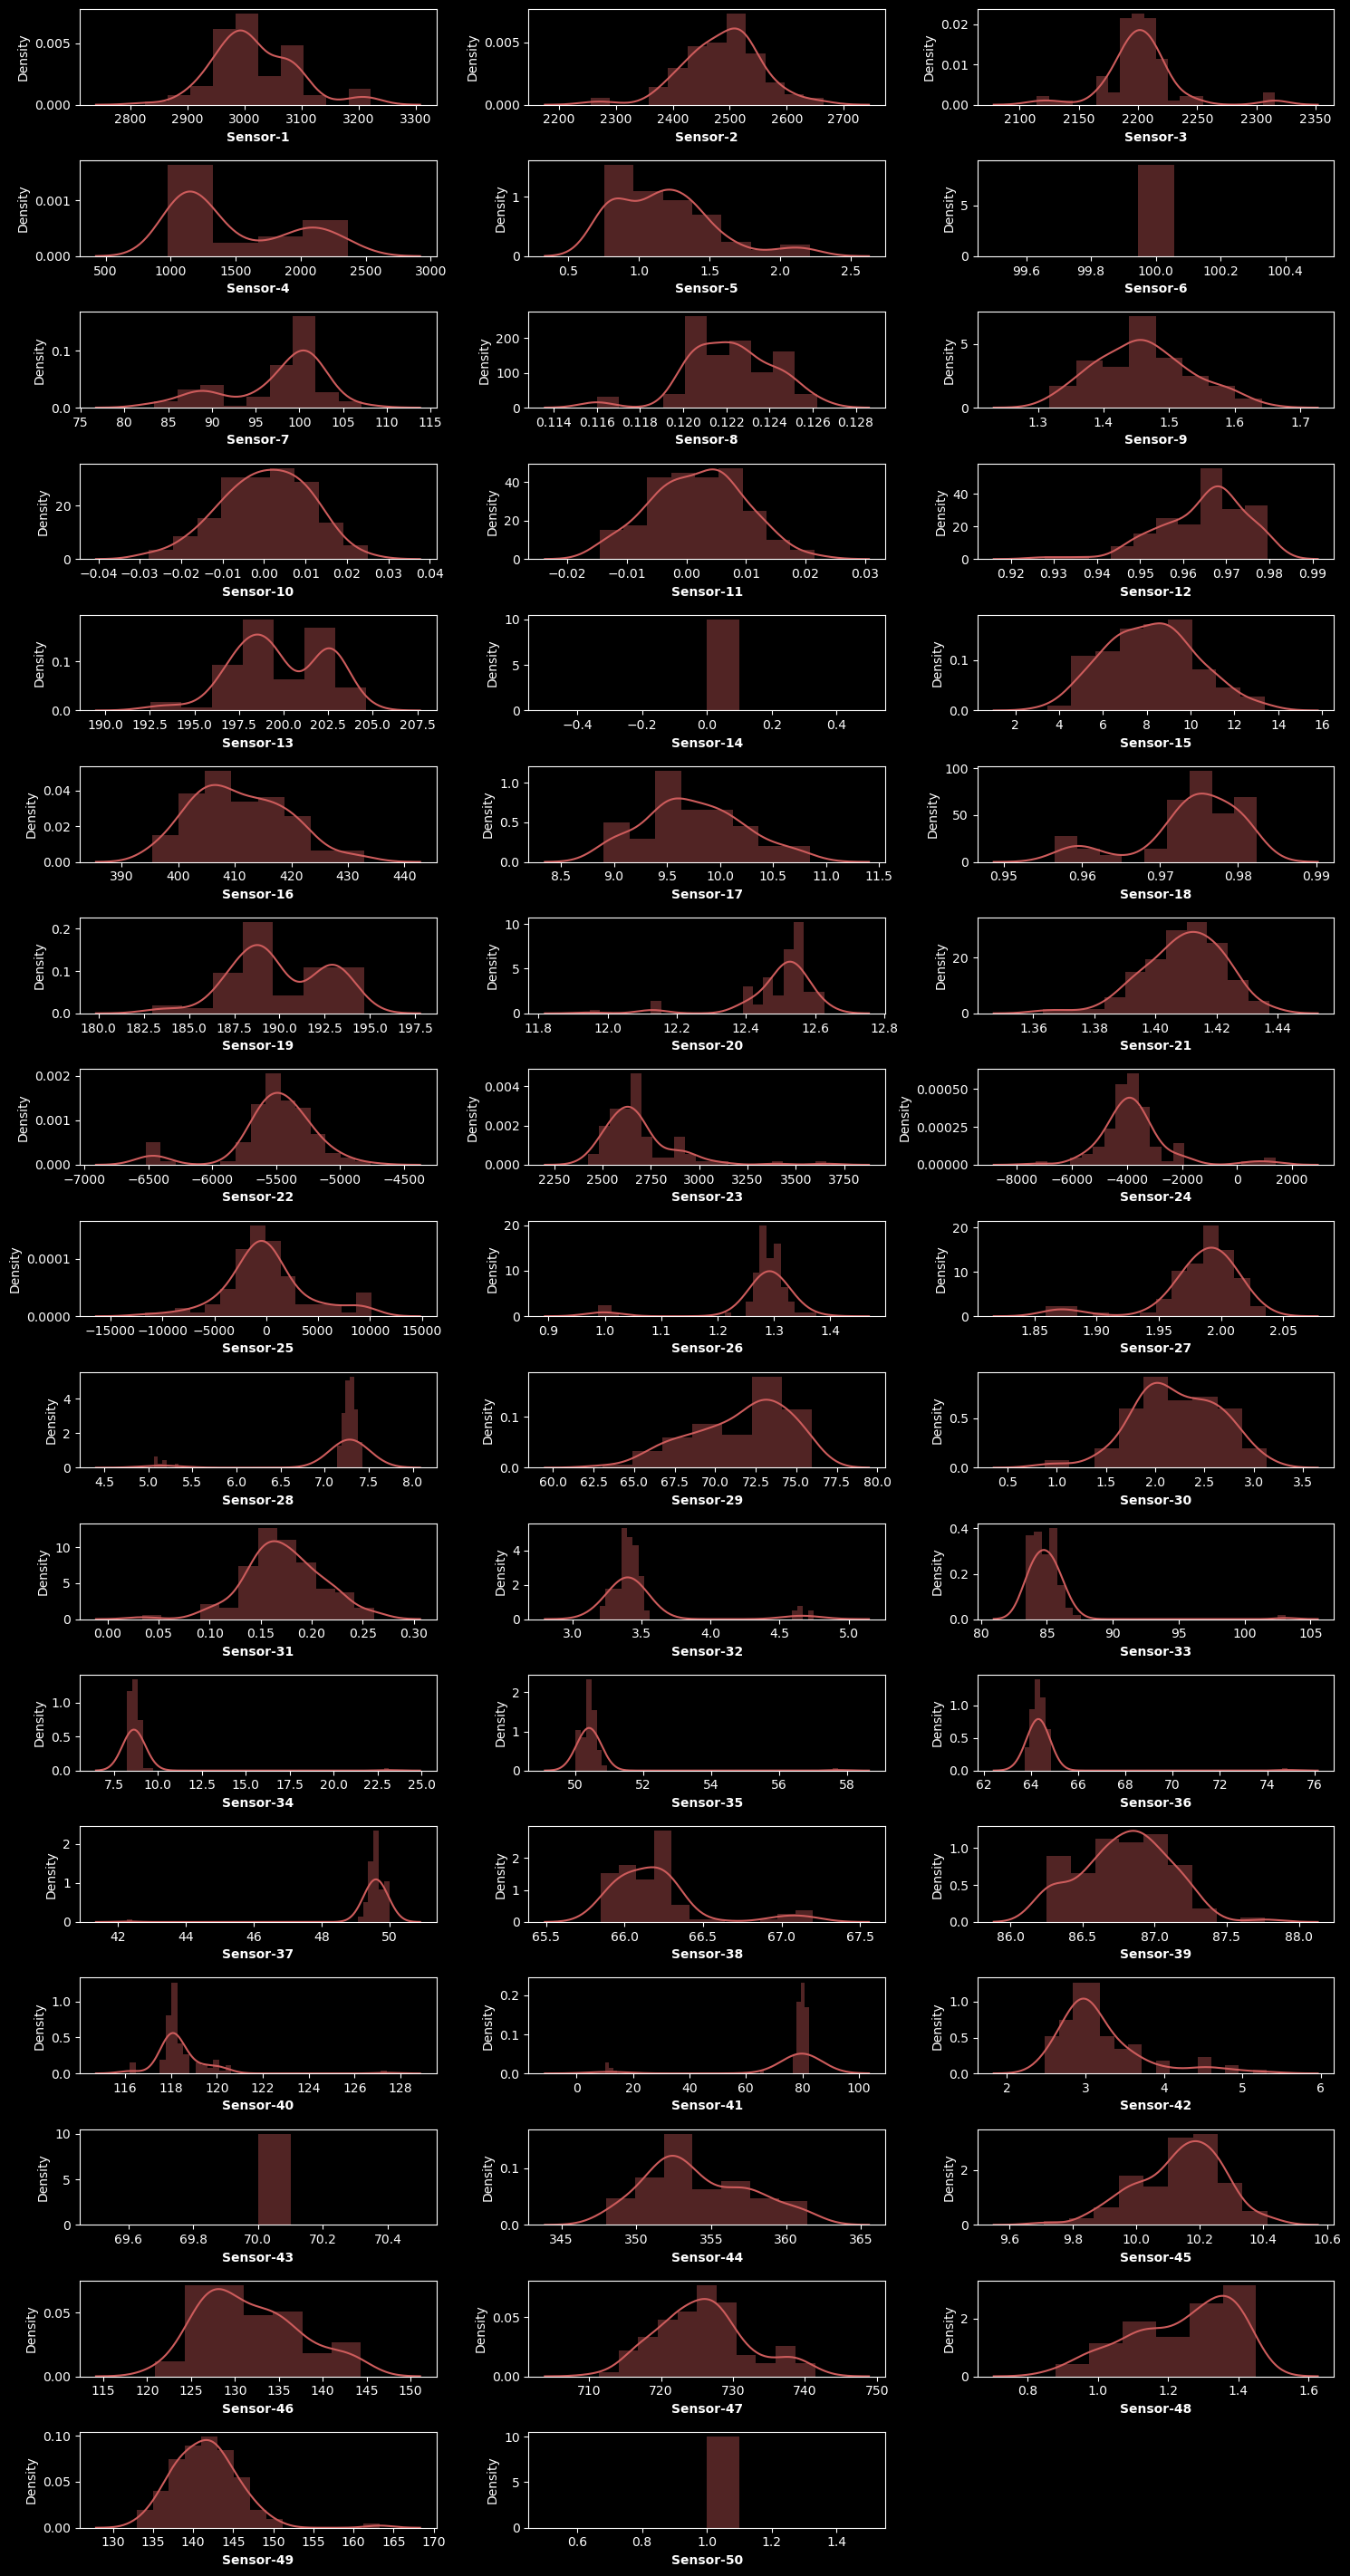

In [93]:
#let's have a look at the distribution first 50 sensors of Wafers-

plt.figure(figsize=(15, 100))

for i, col in enumerate(wafer.columns[1:51]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=wafer[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

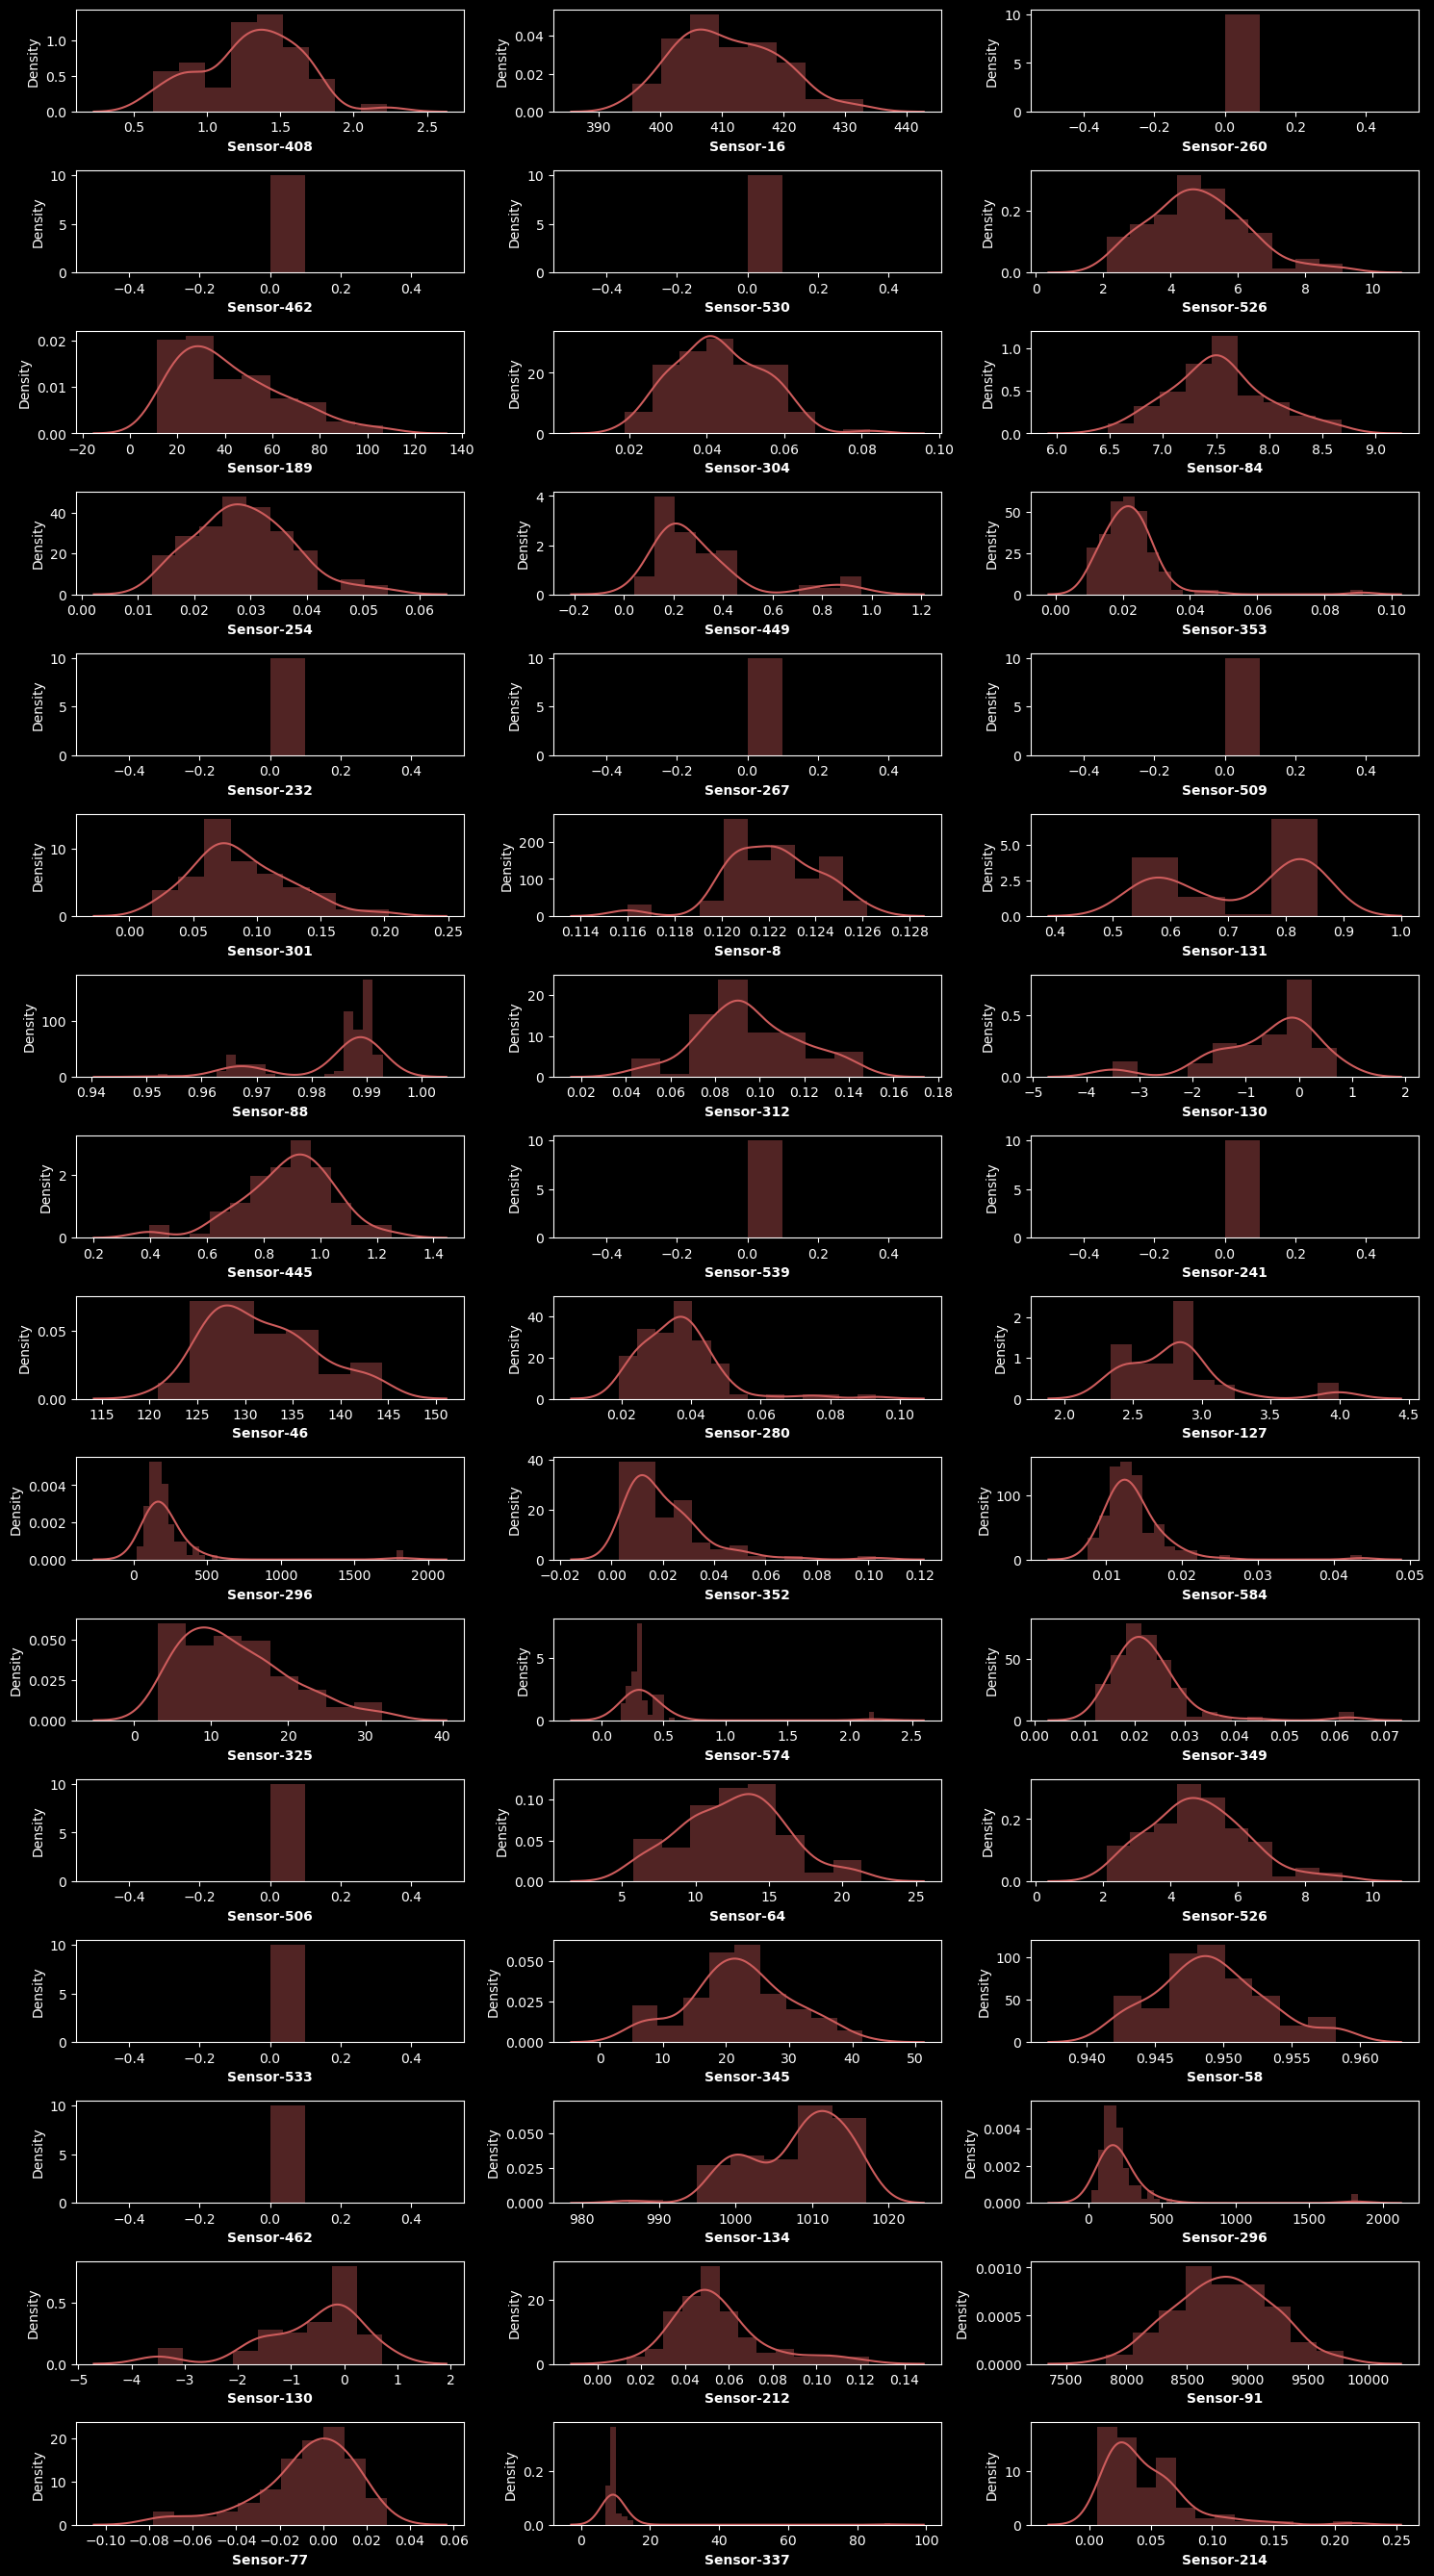

In [94]:
#Select 50 random sensors-

random_50_sensors_idx = []
for i in range(50):
    if i not in random_50_sensors_idx:
        random_50_sensors_idx.append(np.random.randint(1, 591))
        

# let's now, have a look at the distribution of random 50 sensors

plt.figure(figsize=(15, 100))

for i, col in enumerate(wafer.columns[random_50_sensors_idx]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=wafer[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

### * Insight:
#### Pretty good amount of them (either first 50 or random 50) either are constant (have 0 standard deviation) or have left skewness and right skewness. It ain't possible to analyze each feature and deal with its outliers individually, thus we oughta depend upon the scaling.
#### For the features with 0 standard deviation, we can straight away drop them and for others that do have outliers, we gotta go ahead with the Robust Scaling.

### 1.5 Now we are going to drop whose columns have 0 standard deviation-

In [95]:
def get_cols_with_zero_std_dev(df: pd.DataFrame):
    
    #Returns a list of columns names who are having zero standard deviation-
    
    cols_to_drop = []
    num_cols = [col for col in df.columns if df[col].dtype != 'O'] 
    for col in num_cols:
        if df[col].std() == 0:
            cols_to_drop.append(col)
    return cols_to_drop

In [96]:
#Columns with 0 Standard Deviation-

cols_to_drop_2 = get_cols_with_zero_std_dev(df=wafer)
cols_to_drop_2.append("Wafer")
cols_to_drop_2

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Sensor-374',
 'Sensor-375',
 'Se

In [97]:
def get_redundant_cols(df: pd.DataFrame, missing_thresh=.7):
    
    #Returns a list of columns having missing values more than certain thresh-
    
    cols_missing_ratios = df.isna().sum().div(df.shape[0])
    cols_to_drop = list(cols_missing_ratios[cols_missing_ratios > missing_thresh].index)
    return cols_to_drop  

In [98]:
#Columns w missing vals more than 70%-

cols_to_drop_1 = get_redundant_cols(wafer, missing_thresh=.7)
cols_to_drop_1

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']

In [99]:
#Cols to drop-

cols_to_drop = cols_to_drop_1 + cols_to_drop_2

## Feature Selection-

In [121]:
#Separate features and Labels out-

X, y = wafer.drop(cols_to_drop, axis=1), wafer[["Good/Bad"]]

print("Shape of the features now: ", X.shape)
X.head()

Shape of the features now:  (100, 465)


,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,2968.33,2476.58,2216.7333,1748.0885,1.1127,97.5822,0.1242,1.5300,-0.0279,-0.0040,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,2961.04,2506.43,2170.0666,1364.5157,1.5447,96.7700,0.1230,1.3953,0.0084,0.0062,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,3072.03,2500.68,2205.7445,1363.1048,1.0518,101.8644,0.1220,1.3896,0.0138,0.0000,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,3021.83,2419.83,2205.7445,1363.1048,1.0518,101.8644,0.1220,1.4108,-0.0046,-0.0024,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,3006.95,2435.34,2189.8111,1084.6502,1.1993,104.8856,0.1234,1.5094,-0.0046,0.0121,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [122]:
#Independent/Target Variables-

print("Shape of the labels: ", y.shape)
y.head()

Shape of the labels:  (100, 1)


,Good/Bad
0,-1
1,1
2,-1
3,-1
4,-1


## Data Transformation-

In [123]:
imputer = KNNImputer(n_neighbors=3)
preprocessing_pipeline = Pipeline(
    steps=[('Imputer', imputer), ('Scaler', RobustScaler())])
preprocessing_pipeline

Pipeline(steps=[('Imputer', KNNImputer(n_neighbors=3)),
                ('Scaler', RobustScaler())])

In [124]:
#Transform "Wafers" features-

X_trans = preprocessing_pipeline.fit_transform(X)
print("Shape of transformed features set: ", X_trans.shape)
X_trans

Shape of transformed features set:  (100, 465)


array([[-0.37110152, -0.21388855,  0.67805794, ...,  0.515625  ,
        -0.40093   ,  0.        ],
       [-0.44644841,  0.15494872, -1.32959552, ...,  0.515625  ,
        -0.40093   ,  2.        ],
       [ 0.70070541,  0.08389967,  0.20530751, ...,  0.515625  ,
        -0.40093   ,  0.        ],
       ...,
       [ 0.83289837, -1.31558137, -1.26792905, ..., -0.671875  ,
        -0.44021198,  0.        ],
       [-0.49988372,  0.59310515, -0.16308229, ..., -0.671875  ,
        -0.44021198,  0.        ],
       [-0.92374874, -0.35561596,  0.40033513, ..., -0.671875  ,
        -0.44021198,  2.        ]])

### 3.1 Clustering:

In [115]:
pip install kneed

In [116]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from typing import Tuple
from dataclasses import dataclass

In [125]:
@dataclass
class ClusterDataInstances:
    """Divides the given data instances into different clusters via KMeans Clustering algorithm.

    Args:
        X (np.array): Takes in an array which gotta be clustered.
        desc (str): Description of the said array.
    """
    X: np.array
    desc: str

    def _get_ideal_number_of_clusters(self):
        """Returns the ideal number of clusters the given data instances should be divided into by 
        locating the dispersal point in number of clusters vs WCSS plot.

        Raises:
            e: Raises relevant exception should any kinda error pops up while determining the ideal
            number of clusters.

        Returns:
            int: Ideal number of clusters the given data instances should be divided into.
        """
        try:
            print(
                f'Getting the ideal number of clusters to cluster "{self.desc} set" into..')

            ####################### Compute WCSS for shortlisted number of clusters ##########################
            print("computing WCSS for shortlisted number of clusters..")
            wcss = []  # Within Summation of Squares
            for i in range(1, 11):
                kmeans = KMeans(n_clusters=i, init='k-means++',
                                random_state=42)
                kmeans.fit(self.X)
                wcss.append(kmeans.inertia_)
                print(f"WCSS for n_clusters={i}: {kmeans.inertia_}")
            print(
                "WCSS computed successfully for all shortlisted number of clusters!")

            ################### Finalize dispersal point as the ideal number of clusters #####################
            print(
                "Finding the ideal number of clusters (by locating the dispersal point) via Elbow method..")
            knee_finder = KneeLocator(
                range(1, 11), wcss, curve='convex', direction='decreasing')  # range(1, 11) vs WCSS
            print(
                f"Ideal number of clusters to be formed: {knee_finder.knee}")

            return knee_finder.knee
            ...
        except Exception as e:
            print(e)
            raise e

    def create_clusters(self) -> Tuple:
        """Divides the given data instances into the different clusters, they first hand shoud've been divided into
        via offcourse Kmeans Clustering algorithm.

        Raises:
            e: Raises relevant exception should any kinda error pops up while dividing the given data instances into
            clusters.

        Returns:
            (KMeans, np.array): KMeans Clustering object being used to cluster the given data instances and the given dataset 
            along with the cluster labels, respectively.
        """
        try:
            ideal_clusters = self._get_ideal_number_of_clusters()
            print(
                f"Dividing the \"{self.desc}\" instances into {ideal_clusters} clusters via KMeans Clustering algorithm..")
            kmeans = KMeans(n_clusters=ideal_clusters,
                            init='k-means++', random_state=42)
            y_kmeans = kmeans.fit_predict(self.X)
            print(
                f"..said data instances divided into {ideal_clusters} clusters successfully!")

            return kmeans, np.c_[self.X, y_kmeans]
            ...
        except Exception as e:
            print(e)
            raise e

In [126]:
#Cluster `Wafer` instances-

cluster_wafers = ClusterDataInstances(X=X_trans, desc="wafers features")
clusterer, X_clus = cluster_wafers.create_clusters()
X_clus

Getting the ideal number of clusters to cluster "wafers features set" into..
computing WCSS for shortlisted number of clusters..
WCSS for n_clusters=1: 1503049.6472606931
WCSS for n_clusters=2: 512194.0849012661
WCSS for n_clusters=3: 185195.115933283
WCSS for n_clusters=4: 143033.25783274244
WCSS for n_clusters=5: 108688.31540145789
WCSS for n_clusters=6: 88439.04360341988
WCSS for n_clusters=7: 81079.41259322353
WCSS for n_clusters=8: 68622.79634876263
WCSS for n_clusters=9: 61805.44838121718
WCSS for n_clusters=10: 58870.60322516474
WCSS computed successfully for all shortlisted number of clusters!
Finding the ideal number of clusters (by locating the dispersal point) via Elbow method..
Ideal number of clusters to be formed: 3
Dividing the "wafers features" instances into 3 clusters via KMeans Clustering algorithm..
..said data instances divided into 3 clusters successfully!


array([[-0.37110152, -0.21388855,  0.67805794, ..., -0.40093   ,
         0.        ,  0.        ],
       [-0.44644841,  0.15494872, -1.32959552, ..., -0.40093   ,
         2.        ,  0.        ],
       [ 0.70070541,  0.08389967,  0.20530751, ..., -0.40093   ,
         0.        ,  0.        ],
       ...,
       [ 0.83289837, -1.31558137, -1.26792905, ..., -0.44021198,
         0.        ,  0.        ],
       [-0.49988372,  0.59310515, -0.16308229, ..., -0.44021198,
         0.        ,  0.        ],
       [-0.92374874, -0.35561596,  0.40033513, ..., -0.44021198,
         2.        ,  0.        ]])

In [127]:
#Clusters-

np.unique(X_clus[:, -1])

array([0., 1., 2.])

#### The datasets is divided into 3 cluster

In [128]:
#Configure "Clustered" array along with target features-

wafers_clus = np.c_[X_clus, y]

In [129]:
#Cluster_1 data-

wafers_1 = wafers_clus[wafers_clus[:, -2] == 0]
wafers_1.shape

(96, 467)

#### Perhaps we were wrong about dividing the Wafers dataset into clusters, as we can see pretty much of all datapoints lie in the first cluster itself.

### 3.2 Let's take look at another clusters anyway:

In [130]:
#Cluster_2 data

wafers_clus[wafers_clus[:, -2] == 1].shape

(3, 467)

In [131]:
#Cluster_3 data-

wafers_clus[wafers_clus[:, -2] == 2].shape

(1, 467)

#### Thus we mustn't divide the dataset into clusters. Not a good idea!

## Reasamplig Datasets-

In [133]:
X, y = X_trans[:, :-1], y
resampler = SMOTETomek(sampling_strategy="auto")
X_res, y_res = resampler.fit_resample(X, y)

In [134]:
print("Before resampling, Shape of training instances: ", np.c_[X, y].shape)
print("After resampling, Shape of training instances: ", np.c_[X_res, y_res].shape)

Before resampling, Shape of training instances:  (100, 465)
After resampling, Shape of training instances:  (188, 465)


In [135]:
#Target Cats after Resampling-

print(np.unique(y_res))
print(f"Value Counts: \n-1: {len(y_res[y_res == -1])}, 1: {len(y_res[y_res == 1])}")

[-1  1]
Value Counts: 
-1: 188, 1: 188


## Model Training-

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=1/3, random_state=42)

print(f"train set: {X_train.shape, y_train.shape}")
print(f"test set: {X_test.shape, y_test.shape}")

train set: ((125, 464), (125, 1))
test set: ((63, 464), (63, 1))


In [137]:
#Prepared training and test sets-

X_prep = X_train
y_prep = y_train
X_test_prep = X_test
y_test_prep = y_test

print(X_prep.shape, y_prep.shape)
print(X_test_prep.shape, y_test_prep.shape)

(125, 464) (125, 1)
(63, 464) (63, 1)


In [138]:
#Shortlisted base Models-

svc_clf = SVC(kernel='linear')
svc_rbf_clf = SVC(kernel='rbf')
random_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(objective='binary:logistic')

In [139]:
#A function to display Scores-

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

### 5.1 SVC (Kernel='linear'):

In [140]:
#SVC Scores-

svc_scores = cross_val_score(svc_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished


In [141]:
display_scores(svc_scores)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [142]:
#Performance on test set using cross-validation-

#Predictions using cross-validation
svc_preds = cross_val_predict(svc_clf, X_test_prep, y_test_prep, cv=5)

#AUC score
svc_auc = roc_auc_score(y_test_prep, svc_preds)
svc_auc

0.9558823529411764

### 5.2 SVC (kerne='rbf'):

In [143]:
#SVC rbf Scores-

svc_rbf_scores = cross_val_score(svc_rbf_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [144]:
display_scores(svc_rbf_scores)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [145]:
#Performance on test set using cross-validation-

#Predictions using cross-validation
svc_rbf_preds = cross_val_predict(svc_rbf_clf, X_test_prep, y_test_prep, cv=5)

#AUC score
svc_rbf_auc = roc_auc_score(y_test_prep, svc_rbf_preds)
svc_rbf_auc

0.9335699797160244

### 5.3 RandomForestClassifier:

In [146]:
#Random Forest Scores-

random_clf_scores = cross_val_score(random_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.2s finished


In [147]:
display_scores(random_clf_scores)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [148]:
#Performance on test set using cross-validation-

#Predictions using cross-validation
random_clf_preds = cross_val_predict(random_clf, X_test_prep, y_test_prep, cv=5)

#AUC score
random_clf_auc = roc_auc_score(y_test_prep, random_clf_preds)
random_clf_auc

1.0